In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Iris Data Machine Learning Implementation

In [30]:
# Load Iris
iris = pd.read_csv(r"C:\Users\egeeb\Python Workspace\Python\Projects\Datasets\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
# We can Drop ID
iris.drop('Id', axis = 1, inplace = True)

In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
# To Find Labels
print(iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\Users\egeeb\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


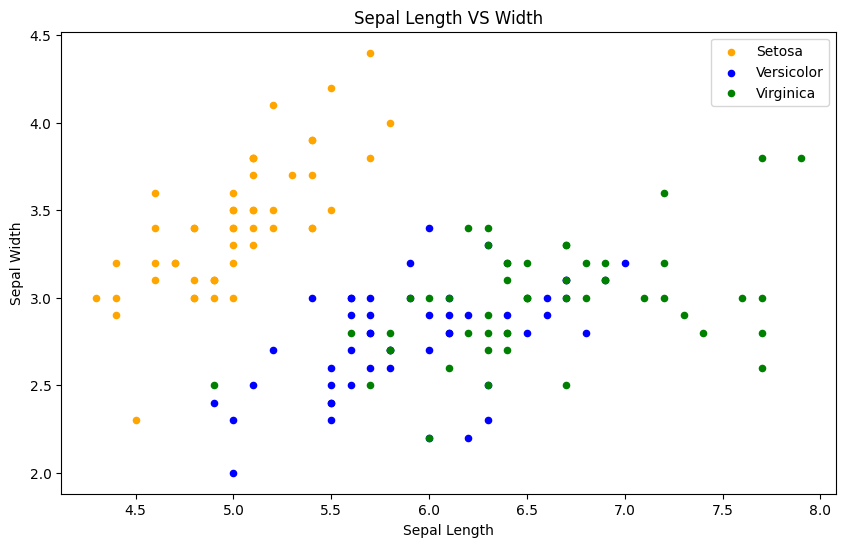

In [35]:
figure = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'orange', label = 'Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'blue', label = 'Versicolor',ax = figure)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'green', label = 'Virginica', ax = figure)
figure.set_xlabel("Sepal Length")
figure.set_ylabel("Sepal Width")
figure.set_title("Sepal Length VS Width")
figure = plt.gcf()
figure.set_size_inches(10,6)
plt.show()

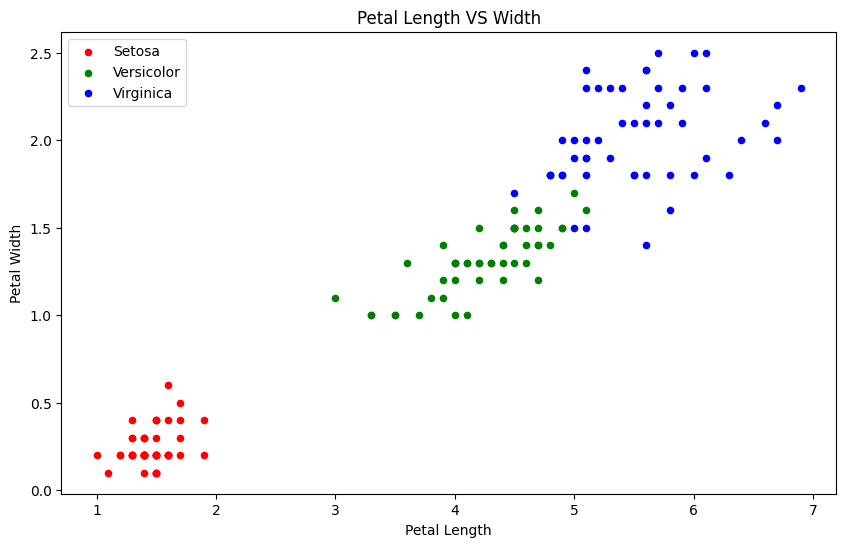

In [36]:
figure = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'Red', label = 'Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'Green', label = 'Versicolor',ax = figure)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'Blue', label = 'Virginica', ax = figure)
figure.set_xlabel("Petal Length")
figure.set_ylabel("Petal Width")
figure.set_title("Petal Length VS Width")
figure = plt.gcf()
figure.set_size_inches(10,6)
plt.show()

According to the figures above; it can be seen that Petal Length-Width comparison will give a clearer cluster comparison.

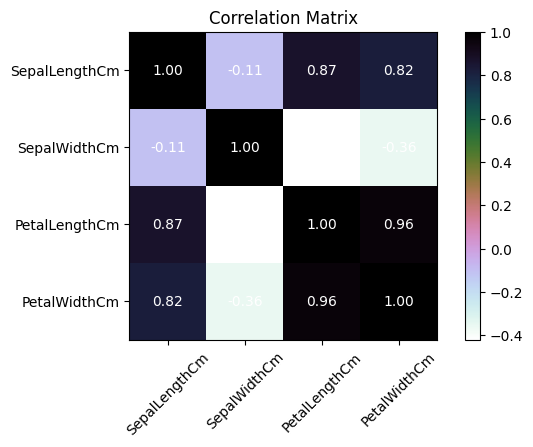

In [42]:
# Exclude non-numeric columns when calculating the correlation matrix
numeric_columns = iris.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Set the figure size
plt.figure(figsize=(7, 4))

# Create a heatmap
heatmap = plt.imshow(correlation_matrix, cmap = 'cubehelix_r', interpolation='nearest')

# Display the correlation values on the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='w')

# Set labels and title
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Matrix")

# Display the colorbar
plt.colorbar(heatmap)

# Show the plot
plt.show()

As it can be seen, there is a very high correlation between Petal Length and Width. This will be more obvious when the model accuracies are compared.

The first evaluation will be made with using all the features.

The final evaluation will be made as a comparison of:
- SVM: Accuracy(Petal Length-Width) vs Accuracy(Sepal Length-Width)
- Logistic Regression: Accuracy(Petal Length-Width) vs Accuracy(Sepal Length-Width)
- Random Forest: Accuracy(Petal Length-Width) vs Accuracy(Sepal Length-Width)
- KNN: Accuracy(Petal Length-Width) vs Accuracy(Sepal Length-Width)
- Decision Tree: Accuracy(Petal Length-Width) vs Accuracy(Sepal Length-Width)

In [38]:
# First Evaluation
def train_evaluate_classification(df, features, label, model_list):
    """
    Train and evaluate machine learning models for a given list of algorithms.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the dataset
    - features (list): List of feature names
    - label (String): The label
    - model_list (list): List of machine learning algorithms (pre-instantiated models)

    Returns:
    - results_df (pd.DataFrame): DataFrame containing algorithm names and corresponding accuracy scores
    """
    results = []

    train, test = train_test_split(df, test_size=0.25, random_state=0)
    train_X = train[features]
    train_y = train[label]
    test_X = test[features]
    test_y = test[label]

    for algorithm in model_list:
        model = algorithm
        model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        accuracy = accuracy_score(prediction, test_y)
        results.append({'Algorithm': algorithm.__class__.__name__, 'Accuracy': accuracy})

    results_df = pd.DataFrame(results)
    return results_df


features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
model_list = [SVC(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]


train_evaluate_classification(iris, features, "Species" , model_list)

,Algorithm,Accuracy
0,SVC,0.973684
1,LogisticRegression,0.973684
2,RandomForestClassifier,0.973684
3,KNeighborsClassifier,0.973684
4,DecisionTreeClassifier,0.973684


## Final Evaluation

The algorithms will be parsed into a custom function as a list, the function will return a dictionary where the key is the name of the algorithm and values are sub-dictionaries of the accuracies of each model with each feature.

In [39]:
model_list = [SVC(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
test_sizes = np.arange(0.1, 1.0, 0.1).tolist()

def train_evaluate_classification_advanced(df, algorithms, test_sizes, features, label):
    """
    Train and evaluate machine learning models for each algorithm using different test sizes.

    Parameters:
    - algorithms (List): List of machine learning algorithms (pre-instantiated models)
    - test_sizes (List): List of test sizes for train_test_split
    - X (List): Features
    - y (List): Target variable

    Returns:
    - results_df (pd.DataFrame): DataFrame containing algorithms, test sizes, and corresponding accuracy scores
    """
    x = df[features]
    species = df[label]
    print(f'Features are: {features}, Label is: {label}')

    results = []

    for algorithm in algorithms:
        algorithm_name = algorithm.__class__.__name__
        algorithm_results = {"Algorithm": algorithm_name}

        for i in test_sizes:
            train_, test_ = train_test_split(df, test_size = i, random_state=0)
            train_x = train_[features]
            train_y = train_[label]
            test_x = test_[features]
            test_y = test_[label]

            model = algorithm
            model.fit(train_x, train_y)
            prediction = model.predict(test_x)

            accuracy = accuracy_score(prediction, test_y)
            algorithm_results[f"Test Size {i}"] = accuracy

        results.append(algorithm_results)

    results_df = pd.DataFrame(results)
    return results_df


train_evaluate_classification_advanced(iris, model_list, test_sizes, ['PetalWidthCm','PetalLengthCm'], "Species")
        


Features are: ['PetalWidthCm', 'PetalLengthCm'], Label is: Species


,Algorithm,Test Size 0.1,Test Size 0.2,Test Size 0.30000000000000004,Test Size 0.4,Test Size 0.5,Test Size 0.6,Test Size 0.7000000000000001,Test Size 0.8,Test Size 0.9
0,SVC,1.0,1.000000,0.978261,0.933333,0.946667,0.955556,0.943396,0.941667,0.911111
1,LogisticRegression,1.0,1.000000,0.978261,0.916667,0.960000,0.944444,0.943396,0.941667,0.925926
2,RandomForestClassifier,1.0,0.966667,0.978261,0.916667,0.906667,0.933333,0.962264,0.933333,0.925926
3,KNeighborsClassifier,1.0,1.000000,0.978261,0.950000,0.960000,0.966667,0.924528,0.916667,0.948148
4,DecisionTreeClassifier,1.0,0.966667,0.956522,0.883333,0.906667,0.922222,0.915094,0.916667,0.940741


In [40]:
train_evaluate_classification_advanced(iris, model_list, test_sizes, ['SepalWidthCm','SepalLengthCm'], "Species")

Features are: ['SepalWidthCm', 'SepalLengthCm'], Label is: Species


,Algorithm,Test Size 0.1,Test Size 0.2,Test Size 0.30000000000000004,Test Size 0.4,Test Size 0.5,Test Size 0.6,Test Size 0.7000000000000001,Test Size 0.8,Test Size 0.9
0,SVC,0.600000,0.733333,0.804348,0.716667,0.720000,0.744444,0.735849,0.750000,0.681481
1,LogisticRegression,0.600000,0.733333,0.804348,0.716667,0.706667,0.722222,0.735849,0.758333,0.777778
2,RandomForestClassifier,0.400000,0.533333,0.586957,0.666667,0.680000,0.633333,0.698113,0.733333,0.666667
3,KNeighborsClassifier,0.733333,0.666667,0.739130,0.666667,0.666667,0.655556,0.688679,0.775000,0.770370
4,DecisionTreeClassifier,0.466667,0.666667,0.652174,0.666667,0.653333,0.622222,0.688679,0.741667,0.740741
